In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # selects features and samples
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

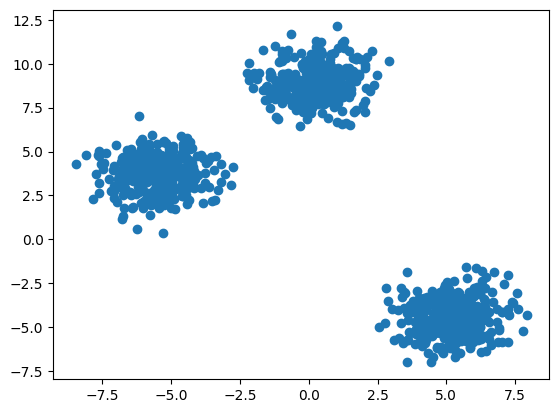

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
from sklearn.cluster import KMeans

In [5]:
# Manual method
## Elbow method to select the k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [6]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0708509383511,
 853.7610520652662,
 756.4175723664418,
 668.0196182731611,
 578.4845331512065,
 531.7823246638227]

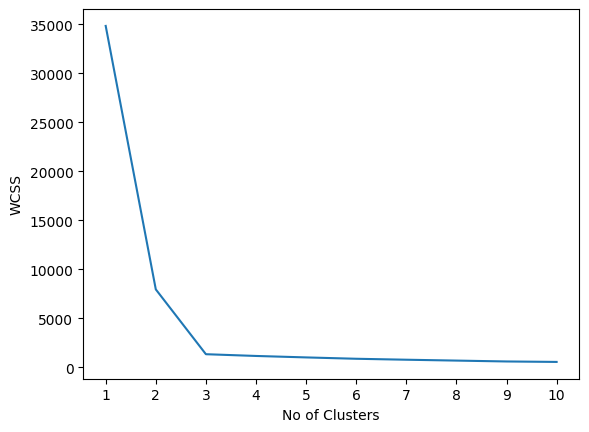

In [7]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

K=3

In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [9]:
y_labels=kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


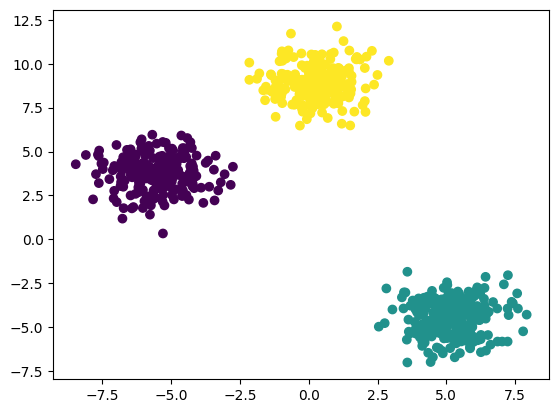

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [12]:
y_test_pred=kmeans.predict(X_test)

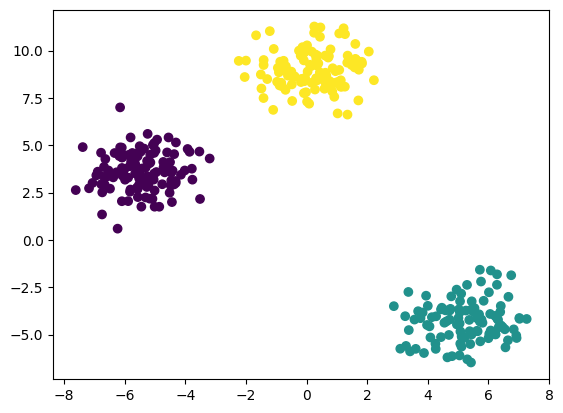

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_pred)

In [17]:
## knee locator
!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [22]:
## performance metrics
## silhouette score
from sklearn.metrics import silhouette_score
silhouette_coef=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coef.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
silhouette_coef

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33546405990172856,
 0.3485964442111187,
 0.3492617247267003,
 0.3456048745725144,
 0.34020693560708065]

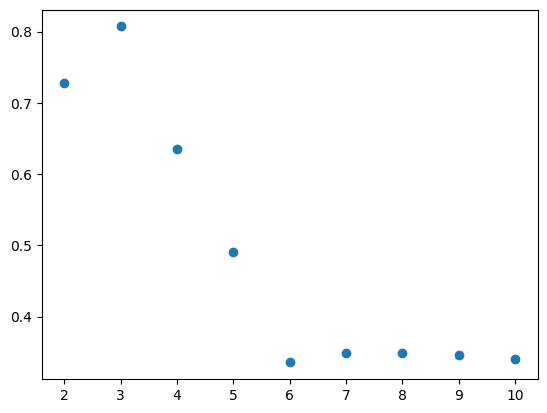

In [24]:
plt.scatter(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.show()

Hierarchical Clustering implementation

In [26]:
from sklearn import datasets

In [27]:
##import the iris dataset
iris=datasets.load_iris()

In [28]:
iris_data=pd.DataFrame(iris.data)

In [29]:
iris_data.columns=iris.feature_names

In [30]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_scaled=scaler.fit_transform(iris_data)

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=2)

In [35]:
pca_scaled=pca.fit_transform(X_scaled)

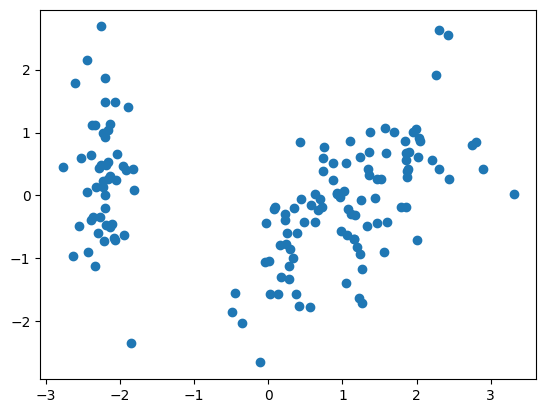

In [36]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

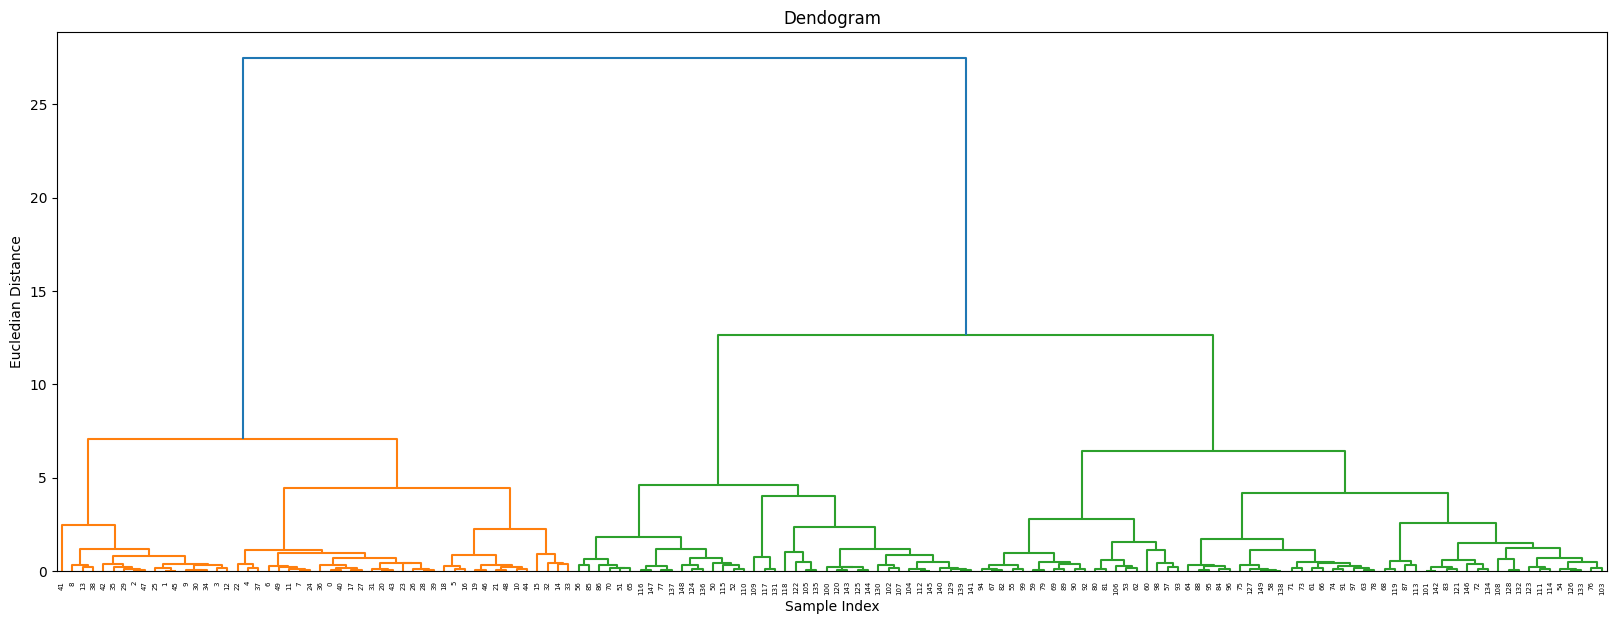

In [38]:
##Agglomerative Clustering
##To construct a dendogram(important)
import scipy.cluster.hierarchy as sc
## plot the dendogram
plt.figure(figsize=(20,7))
plt.title('Dendograms')

## create dendograms
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))# fixed parameters
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

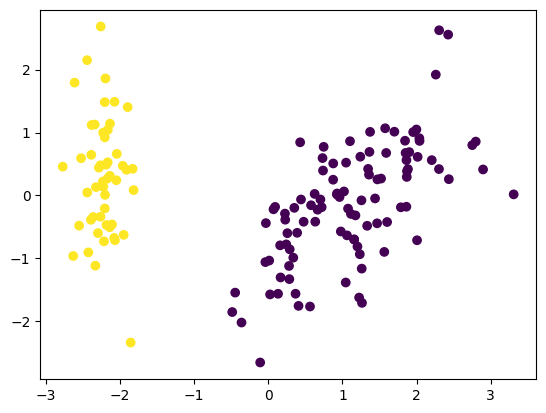

In [41]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [40]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
#silhouetter score
# note: you start at 2 clusters for silhouette score
silhouette_coef=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coef.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

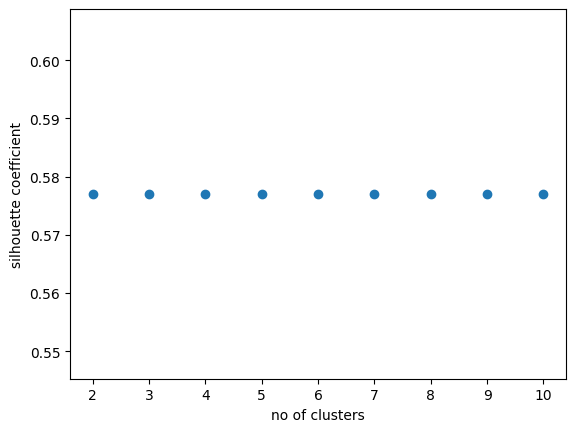

In [43]:
plt.scatter(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

DBScan **Clustering**

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [46]:
X,y=make_moons(n_samples=250,noise=0.05)

In [47]:
X

array([[ 1.56379335e-01,  1.01459147e-02],
       [ 1.47312866e+00, -2.81620568e-01],
       [ 3.49034154e-01, -3.15080385e-01],
       [ 1.66300655e+00, -1.43786943e-01],
       [ 8.73398343e-01, -4.94630894e-01],
       [ 1.76253991e-01,  1.04264851e+00],
       [-5.01000634e-01,  8.47946662e-01],
       [ 1.52135897e+00, -4.10057646e-01],
       [ 4.82531087e-01, -3.46092000e-01],
       [ 1.00108126e+00,  2.89306981e-01],
       [ 1.40495232e+00, -4.29435129e-01],
       [ 5.18226597e-01,  8.55950537e-01],
       [ 9.67733855e-01, -5.17884100e-01],
       [-5.81786399e-02,  1.01013527e+00],
       [-9.53201515e-01,  2.28369271e-01],
       [ 2.44717208e-01, -1.50018798e-01],
       [ 2.08510498e-01, -1.13314135e-01],
       [ 1.83823267e+00,  9.12770993e-02],
       [ 6.41448639e-01,  8.02241258e-01],
       [-1.50331519e-02,  9.34274307e-01],
       [ 6.08893490e-01,  8.41493463e-01],
       [-6.58653368e-01,  7.97657404e-01],
       [ 1.64876857e+00, -2.04518312e-01],
       [-1.

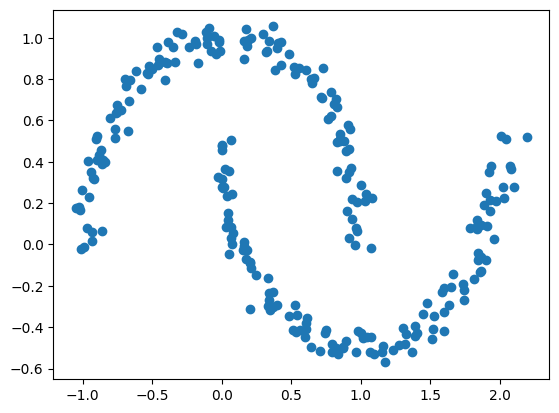

In [48]:
plt.scatter(X[:,0],X[:,1])

In [49]:
## feature scaling(Standard scaling)
X_scaled=scaler.fit_transform(X)

In [50]:
##DBSCan algorithm
dbscan=DBSCAN(eps=0.5)

In [51]:
dbscan.fit(X_scaled)

DBSCAN()

In [52]:
dbscan.labels_

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1])

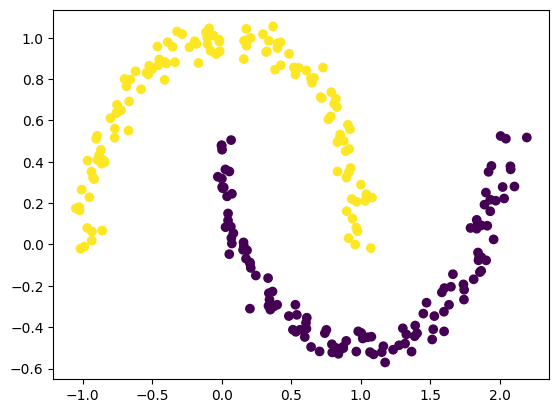

In [53]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)